In [1]:
import numpy as np
import pandas as pd
from glmnet import GLMNet, RegGLM, GLM
from sklearn.base import clone
import statsmodels.api as sm
from ISLP.models import summarize
import logging
logging.basicConfig(filename='log.txt', level=logging.DEBUG)
from sklearn.metrics import accuracy_score

import rpy2
%load_ext rpy2.ipython

   user  system elapsed 
  1.315   0.007   1.322 


Loaded lars 1.3

Loading required package: Matrix
Loaded glmnet 4.1-4


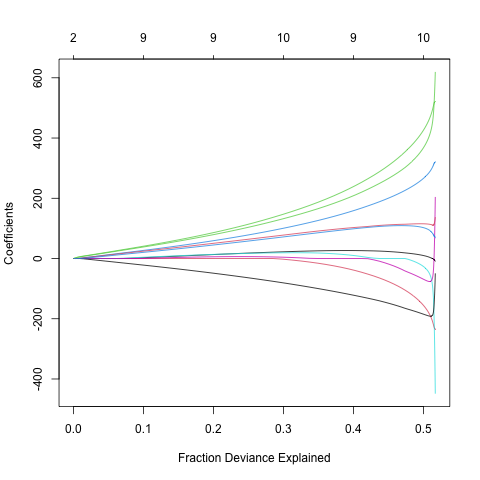

In [2]:
%%R -o X,Y,N
#install.packages('lars', repo='http://cloud.r-project.org')
library(lars)
library(glmnet)
data(diabetes)
X = model.matrix(lm(y ~ x, data=diabetes))[,-1]
N = colnames(diabetes$x)
Y = diabetes$y
plot(glmnet(X, Y, family=gaussian(), alpha=0.4), xvar='dev')
system.time(cv.glmnet(X, Y, family=gaussian(), 
                      alpha=0.4, nfolds=10))

In [3]:
X = pd.DataFrame(X, columns=N)
G = GLMNet(alpha=.4)
G.fit(X, Y)

GLMNet(lambda_values=array([1.00000000e+00, 9.11162756e-01, 8.30217568e-01, 7.56463328e-01,
       6.89261210e-01, 6.28029144e-01, 5.72236766e-01, 5.21400829e-01,
       4.75081016e-01, 4.32876128e-01, 3.94420606e-01, 3.59381366e-01,
       3.27454916e-01, 2.98364724e-01, 2.71858824e-01, 2.47707636e-01,
       2.25701972e-01, 2.05651231e-01, 1.87381742e-01, 1.70735265e-01,
       1.55567614e-01, 1.41747416e-01, 1.29154967e-01, 1.17681195e-01,
       1.07226722e-01, 9.77009957e-02, 8.90215085e-02, 8.11130831e-02,
       7.39072203e-02, 6.73415066e-02, 6.13590727e-02, 5.59081018e-02,
       5.09413801e-02, 4.64158883e-02, 4.22924287e-02, 3.85352859e-02,
       3.51119173e-02, 3.19926714e-02, 2.91505306e-02, 2.65608778e-02,
       2.42012826e-02, 2.20513074e-02, 2.00923300e-02, 1.83073828e-02,
       1.66810054e-02, 1.51991108e-02, 1.38488637e-02, 1.26185688e-02,
       1.14975700e-02, 1.04761575e-02, 9.54548457e-03, 8.69749003e-03,
       7.92482898e-03, 7.22080902e-03, 6.57933225e-03, 5.99484250e-03,
       5.46227722e-03, 4.97702356e-03, 4.53487851e-03, 4.13201240e-03,
       3.76493581e-03, 3.43046929e-03, 3.12571585e-03, 2.84803587e-03,
       2.59502421e-03, 2.36448941e-03, 2.15443469e-03, 1.96304065e-03,
       1.78864953e-03, 1.62975083e-03, 1.48496826e-03, 1.35304777e-03,
       1.23284674e-03, 1.12332403e-03, 1.02353102e-03, 9.32603347e-04,
       8.49753436e-04, 7.74263683e-04, 7.05480231e-04, 6.42807312e-04,
       5.85702082e-04, 5.33669923e-04, 4.86260158e-04, 4.43062146e-04,
       4.03701726e-04, 3.67837977e-04, 3.35160265e-04, 3.05385551e-04,
       2.78255940e-04, 2.53536449e-04, 2.31012970e-04, 2.10490414e-04,
       1.91791026e-04, 1.74752840e-04, 1.59228279e-04, 1.45082878e-04,
       1.32194115e-04, 1.20450354e-04, 1.09749877e-04, 1.00000000e-04]), lambda_fractional=True, alpha=0.4, lower_limits=-inf, upper_limits=inf, penalty_factor=None, fit_intercept=True, standardize=True, family=<statsmodels.genmod.families.family.Gaussian object at 0x177602c50>, control=GLMNetControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05))

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Coefficients ($\\beta$)'>

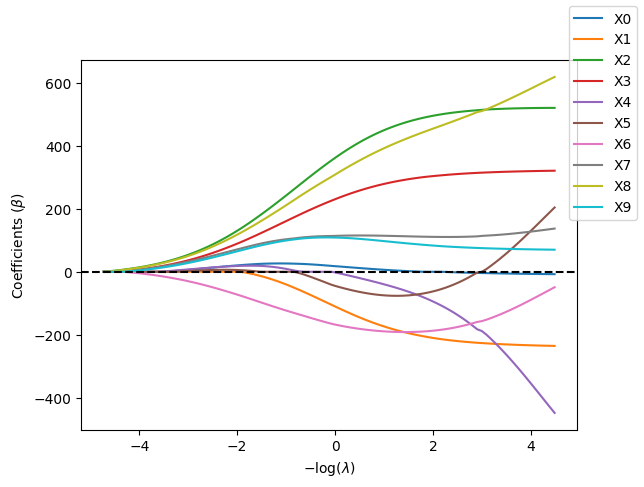

In [4]:
G.plot_coefficients(legend=True)

In [5]:
#%%prun 
cv_scores, lambda_best, lambda_1se = G.cross_validation_path(X, Y, cv=10, alignment='lambda')
cv_scores

,Gaussian Deviance,Mean Squared Error,Mean Absolute Error,SD(Gaussian Deviance),SD(Mean Squared Error),SD(Mean Absolute Error)
lambda,,,,,,
112.900075,5963.559321,5963.559321,65.930331,388.619692,388.619692,2.530825
102.870344,5956.282613,5956.282613,65.891166,388.897379,388.897379,2.533148
93.731626,5944.485936,5944.485936,65.828687,388.147697,388.147697,2.530712
85.404766,5928.651941,5928.651941,65.743362,387.544257,387.544257,2.529310
77.817642,5907.564728,5907.564728,65.629972,386.985529,386.985529,2.528491
...,...,...,...,...,...,...
0.016380,2997.796759,2997.796759,44.196309,221.032180,221.032180,1.827806
0.014925,2997.781153,2997.781153,44.194418,221.337905,221.337905,1.831152
0.013599,2997.771021,2997.771021,44.192506,221.636329,221.636329,1.834438


In [6]:
#%%timeit
G.control.logging = True
G.cross_validation_path(X, Y, cv=50, alignment='lambda')

(            Gaussian Deviance  Mean Squared Error  Mean Absolute Error  \
 lambda                                                                   
 112.900075        5959.590537         5959.590537            65.964632   
 102.870344        5954.977911         5954.977911            65.939026   
 93.731626         5944.157114         5944.157114            65.882148   
 85.404766         5929.443226         5929.443226            65.803881   
 77.817642         5911.015939         5911.015939            65.704940   
 ...                       ...                 ...                  ...   
 0.016380          2997.165416         2997.165416            44.225434   
 0.014925          2997.021569         2997.021569            44.224716   
 0.013599          2996.888139         2996.888139            44.224031   
 0.012391          2996.768026         2996.768026            44.223384   
 0.011290          2996.336128         2996.336128            44.222490   
 
             SD(Gaussia

In [7]:
G.cv_scores_

,Gaussian Deviance,Mean Squared Error,Mean Absolute Error,SD(Gaussian Deviance),SD(Mean Squared Error),SD(Mean Absolute Error)
lambda,,,,,,
112.900075,5959.590537,5959.590537,65.964632,339.937340,339.937340,2.256583
102.870344,5954.977911,5954.977911,65.939026,340.046742,340.046742,2.257719
93.731626,5944.157114,5944.157114,65.882148,339.461720,339.461720,2.255976
85.404766,5929.443226,5929.443226,65.803881,338.788360,338.788360,2.253929
77.817642,5911.015939,5911.015939,65.704940,338.092004,338.092004,2.252222
...,...,...,...,...,...,...
0.016380,2997.165416,2997.165416,44.225434,190.580307,190.580307,1.619584
0.014925,2997.021569,2997.021569,44.224716,190.602131,190.602131,1.619698
0.013599,2996.888139,2996.888139,44.224031,190.617312,190.617312,1.619810


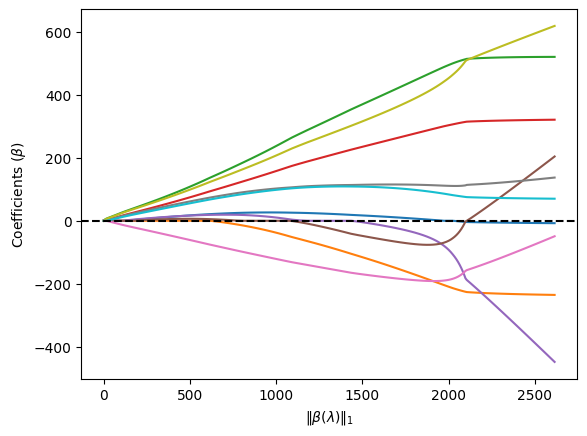

In [8]:
G.plot_coefficients(xvar='norm');

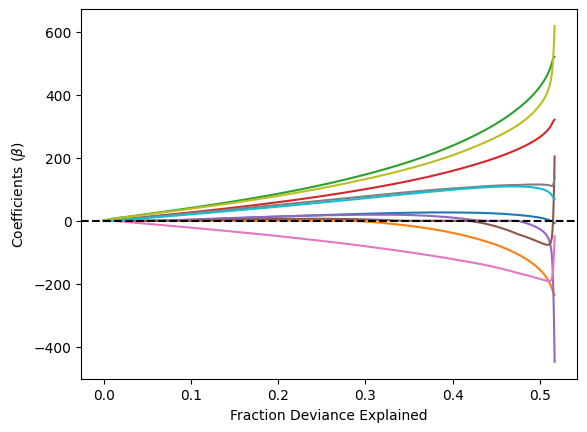

In [9]:
G.plot_coefficients(xvar='dev');

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Gaussian Deviance'>

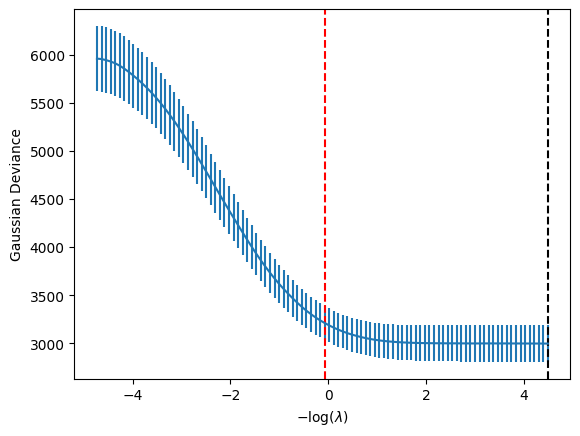

In [10]:
G.plot_cross_validation()

<Axes: xlabel='Fraction Deviance Explained', ylabel='Mean Absolute Error'>

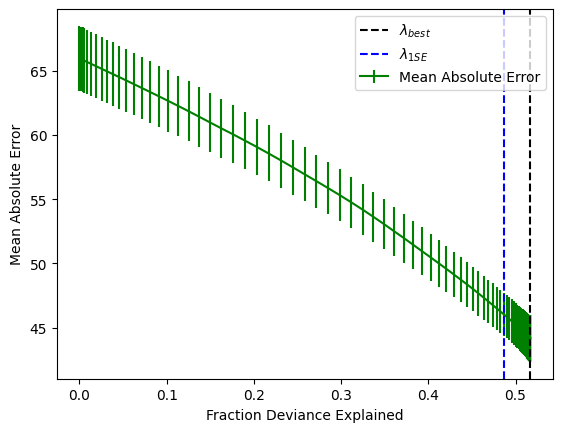

In [11]:
G2 = clone(G)
G2.fit(X, Y)
G2.cross_validation_path(X, Y, cv=10, alignment='fraction')
G2.plot_cross_validation(c='green', label='My label', legend=True, col_1se='blue', score='Mean Absolute Error', xvar='dev')

In [12]:
yb = Y > 140
X.insert(0, 'intercept', np.ones(Y.shape[0]))
glm = sm.GLM(yb,X,family=sm.families.Binomial())
results=glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0043,0.126,0.034,0.973
age,1.0364,2.792,0.371,0.711
sex,-11.7477,3.078,-3.816,0.000
bmi,13.8258,3.323,4.160,0.000
map,11.5431,3.120,3.700,0.000
tc,-32.9068,23.367,-1.408,0.159
ldl,22.8217,19.820,1.151,0.250
hdl,-0.4775,11.311,-0.042,0.966
tch,0.8474,8.079,0.105,0.916
ltg,29.5754,9.739,3.037,0.002


In [13]:
from glmnet import GLM, RegGLM

#G3 = GLMNetPath(alpha=.4,family=sm.families.Binomial())
G3 = GLM(family=sm.families.Binomial(), summarize=True)
G3.fit(X.drop(columns=['intercept']), yb)
G3.summary_

,coef,std err,z,P>|z|
intercept,0.004324,2.651439,0.001631,0.998699
age,1.036363,58.708020,0.017653,0.985916
sex,-11.747698,64.717706,-0.181522,0.855958
bmi,13.825778,69.864888,0.197893,0.843129
map,11.543055,65.584842,0.176002,0.860292
tc,-32.906817,491.257990,-0.066985,0.946594
ldl,22.821665,416.690366,0.054769,0.956323
hdl,-0.477463,237.806917,-0.002008,0.998398
tch,0.847433,169.847328,0.004989,0.996019
ltg,29.575377,204.741097,0.144453,0.885143


In [14]:
np.isnan(yb).sum()

0

In [15]:
G3 = RegGLM(family=sm.families.Binomial(), alpha=0.4, lambda_val=0.02081227758950013)
G3.fit(X.drop(columns=['intercept']), yb)
G3.coef_
G3.null_deviance_

612.7421076149917

In [16]:
G4 = GLMNet(family=sm.families.Binomial(), alpha=0.4 )
G4.fit(X.drop(columns=['intercept']), yb)
G4.cross_validation_path(X.drop(columns=['intercept']), yb, cv=10, alignment='lambda')

(          Binomial Deviance  Mean Squared Error  Mean Absolute Error  \
 lambda                                                                 
 0.592814           1.382279            0.248996             0.498957   
 0.540150           1.368135            0.245464             0.495283   
 0.492164           1.342688            0.239118             0.488526   
 0.448442           1.317420            0.232844             0.481513   
 0.408603           1.293317            0.226903             0.474506   
 ...                     ...                 ...                  ...   
 0.000199           1.000221            0.166481             0.320840   
 0.000181           1.000308            0.166494             0.320816   
 0.000165           1.000443            0.166516             0.320814   
 0.000150           1.000558            0.166534             0.320807   
 0.000137           1.000531            0.166530             0.320810   
 
           Accuracy       AUC  SD(Binomial Devian

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Binomial Deviance'>

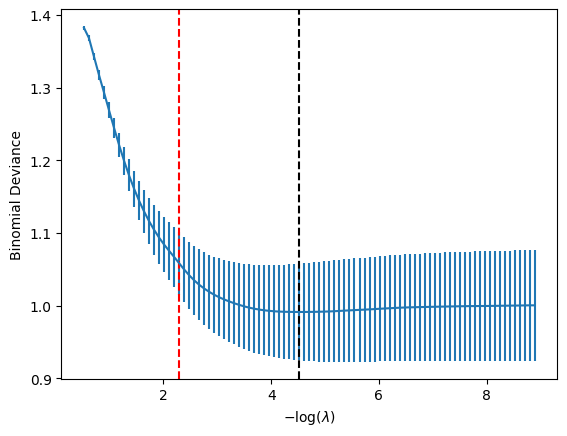

In [17]:
G4.plot_cross_validation()

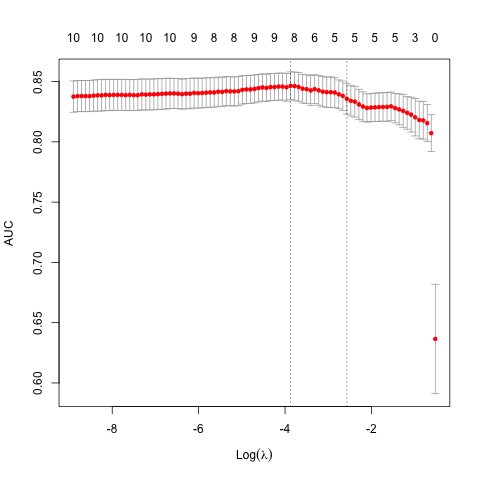

In [18]:
%%R
plot(cv.glmnet(X, Y>140, family='binomial', alpha=0.4, type.measure='auc'))


<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Accuracy'>

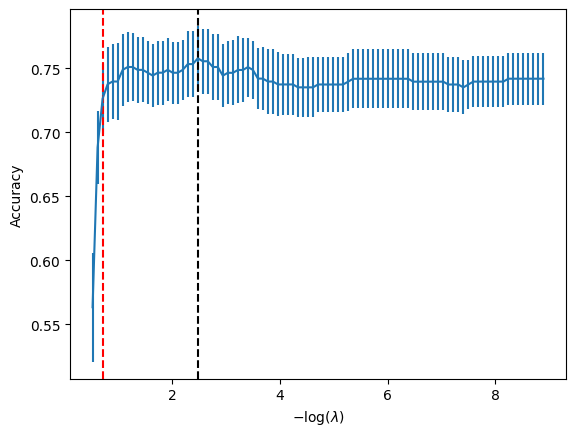

In [19]:
G4.plot_cross_validation(score='Accuracy')

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='AUC'>

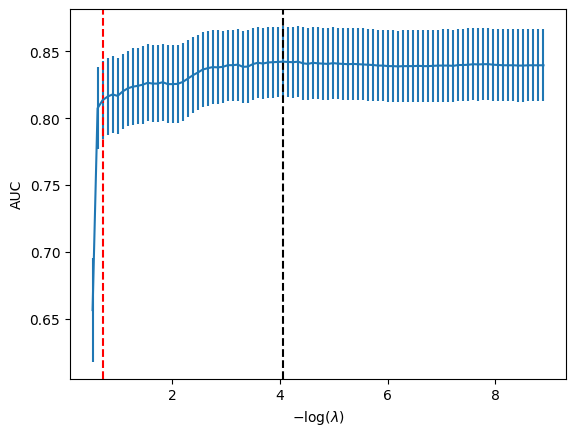

In [20]:
G4.plot_cross_validation(score='AUC')

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Misclassification Error'>

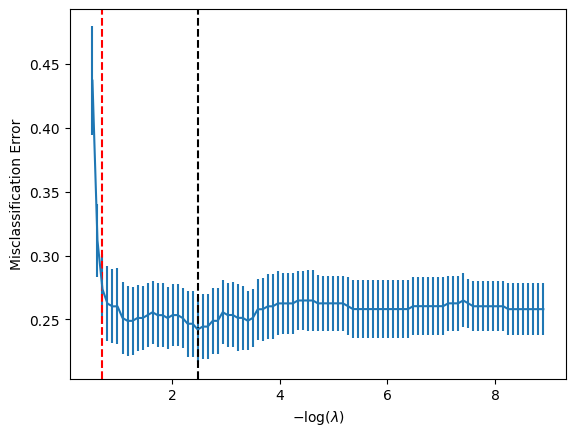

In [21]:
def misclass_score(y, yhat, sample_weight):
    # y is assumed binary
    # yhat will be on response scale
    label = yhat > 0.5
    return 1 - accuracy_score(y, 
                              label, sample_weight=sample_weight, normalize=True)
    
G5 = GLMNet(family=sm.families.Binomial(), alpha=0.4 )
G5.fit(X.drop(columns=['intercept']), yb)
G5.cross_validation_path(X.drop(columns=['intercept']), yb, cv=10, alignment='lambda',
                         scorers=[('Misclassification Error', misclass_score, 'min')])
G5.plot_cross_validation(score='Misclassification Error')


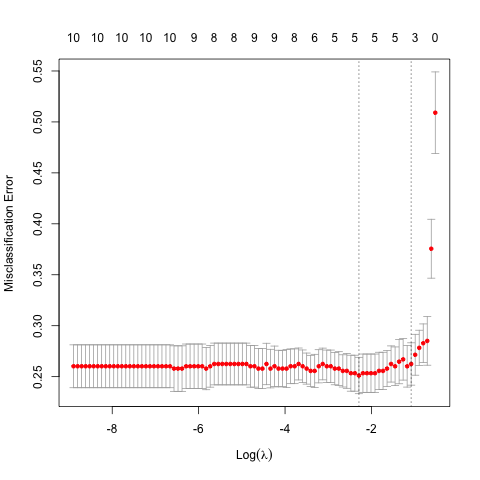

In [22]:
%%R
plot(cv.glmnet(X, Y>140, family='binomial', alpha=0.4, type.measure='class'))


,My Error,SD(My Error)
lambda,,
0.592814,0.500253,0.013309
0.540150,0.500253,0.013309
0.492164,0.500253,0.013309
0.448442,0.495707,0.012334
0.408603,0.482121,0.013408
...,...,...
0.000199,0.253586,0.027995
0.000181,0.253586,0.027995
0.000165,0.253586,0.027995


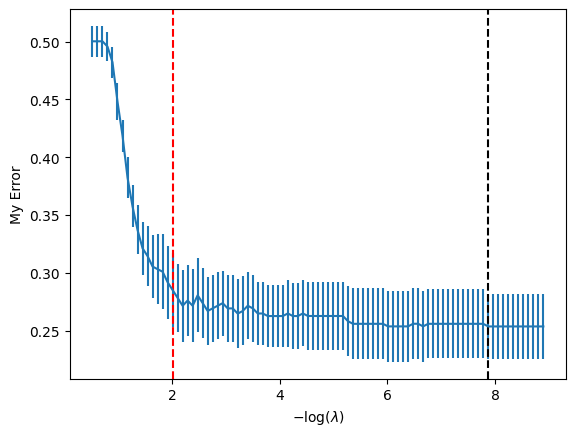

In [23]:
def my_score(y, yhat, sample_weight):
    # y is assumed binary
    # yhat will be on response scale
    label = yhat > 0.6
    return 1 - accuracy_score(y, 
                              label, sample_weight=sample_weight, normalize=True)
    
G6 = GLMNet(family=sm.families.Binomial(), alpha=0.4 )
G6.fit(X.drop(columns=['intercept']), yb)
G6.cross_validation_path(X.drop(columns=['intercept']), yb, cv=10, alignment='lambda',
                         scorers=[('My Error', my_score, 'min')])
G6.plot_cross_validation(score='My Error')
G6.cv_scores_